In [2]:
import pandas as pd
import numpy as np
from scipy.optimize import differential_evolution
import sys
sys.path.append('./src/')
import HBV
from tqdm import tqdm

In [32]:
def bias(obs, sim):
    """ Bias (shift) between timeseries"""
    return np.abs(np.mean(obs - sim))

def rmse(obs, sim):
    """ Root Mean Square Error (RMSE)"""
    return np.sqrt(np.mean((obs - sim)**2))

def one_minus_nse(obs, sim):
    """ Nash–Sutcliffe model Efficiency coefficient (NSE) """
    return 1-(1 - (np.sum((obs - sim)**2)) / (np.sum((obs - np.mean(obs))**2)))

def bias_flows_below_one(obs, sim):
    """ Bias for sections for the data with flows below one """
    idx = np.argwhere(obs <= 1)
    return np.abs(np.mean(obs[idx] - sim[idx]))

def hbv(param, precip, temp, pet):
    # Run HBV snow routine
    p_s, _, _ = HBV.snow_routine(param[:4], temp, precip)
    # Run HBV runoff simulation
    Case = 1 # for now we assume that the preferred path in the upper zone is runoff (Case = 1), it can be set to percolation (Case = 2)
    ini = np.array([0,0,0]) # initial state
    runoff_sim, _, _ = HBV.hbv_sim(param[4:], p_s, pet, 1, ini)
    return runoff_sim

def loss_hbv(param, precip, temp, pet, runoff_obs, objective_fun):
    runoff_sim = hbv(param, precip, temp, pet)
    return objective_fun(runoff_obs, runoff_sim)

def load_catchment_data(catchment_name):
    file_dic = {"Siletz River, OR, USA": "camels_14305500", "Medina River, TX, USA": "camels_08178880", "Trout River, BC, Canada": "hysets_10BE007"}
    
    start_date = '2002-10-01'
    end_date   = '2004-09-30'
    
    df_obs         = pd.read_csv(f"./data/{file_dic[catchment_name]}.csv")       
    df_obs.date    = pd.to_datetime(df_obs['date'], format='%Y-%m-%d')  # convert date string to datetime 
    df_obs         = df_obs.set_index('date')                           # use date as index
    df_obs         = df_obs[start_date:end_date]                        # select between start date and end dat
    df_obs["date"] = df_obs.index.map(lambda s: s.strftime('%b-%d-%y')) # again, add a date column for plotting 
    df_obs         = df_obs.reset_index(drop=True)         
    df_obs         = df_obs[["snow_depth_water_equivalent_mean", "total_precipitation_sum","potential_evaporation_sum", "streamflow", "temperature_2m_mean", "date"]]
    df_obs.columns = ["Snow [mm/day]", "P [mm/day]", "PET [mm/day]", "Q [mm/day]", "T [C]", "Date"]

    return df_obs

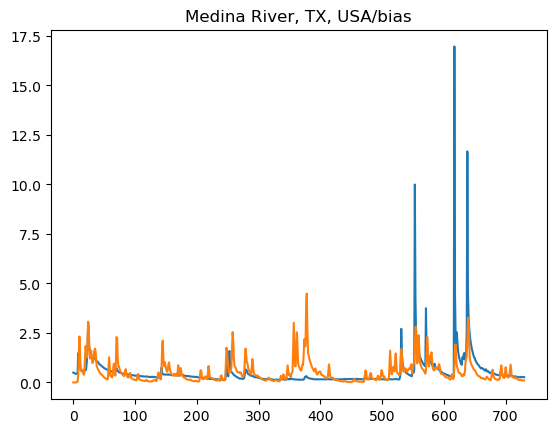

             message: Maximum number of iterations has been exceeded.
             success: False
                 fun: 3.820090764464824e-10
                   x: [-7.600e-01  2.524e+00 ...  7.442e+01  3.505e+00]
                 nit: 30
                nfev: 6479
          population: [[-7.600e-01  2.524e+00 ...  7.442e+01  3.505e+00]
                       [ 2.395e+00  5.567e+00 ...  9.529e+01  5.705e+00]
                       ...
                       [-2.476e+00  1.651e+01 ...  7.012e+01  4.986e+00]
                       [-2.570e+00  1.685e+01 ...  6.783e+01  5.427e+00]]
 population_energies: [ 3.820e-10  2.080e-03 ...  5.941e-03  7.290e-04]
                 jac: [ 0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]


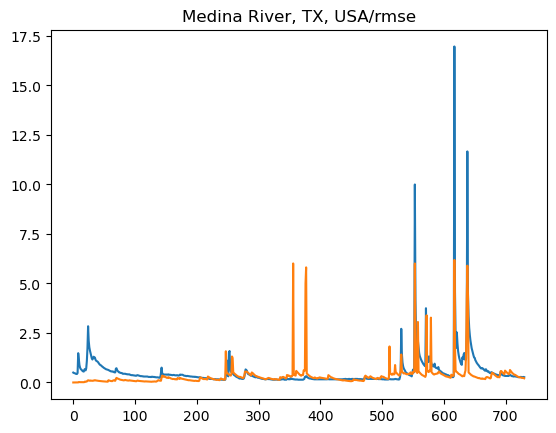

             message: Maximum number of iterations has been exceeded.
             success: False
                 fun: 0.7801885614236714
                   x: [-8.808e-01  1.564e+01 ...  5.224e+00  1.718e+00]
                 nit: 30
                nfev: 7235
          population: [[-8.808e-01  1.564e+01 ...  5.498e+00  1.718e+00]
                       [-2.788e+00  1.061e+00 ...  2.091e+01  1.886e+00]
                       ...
                       [-1.734e+00  8.340e+00 ...  5.652e+00  1.699e+00]
                       [-1.004e+00  2.960e+00 ...  7.020e+01  1.182e+00]]
 population_energies: [ 7.802e-01  8.499e-01 ...  8.450e-01  8.532e-01]
                 jac: [ 0.000e+00  0.000e+00 ...  1.759e-03  0.000e+00]


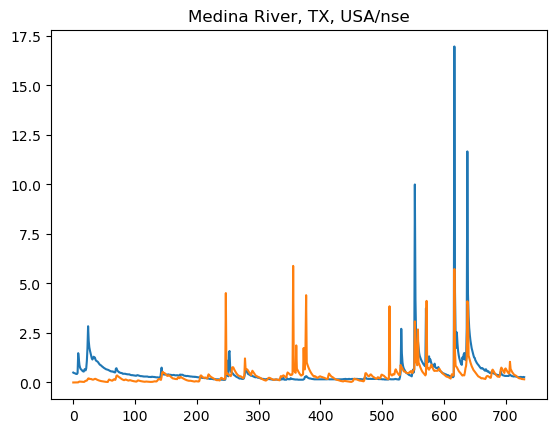

             message: Maximum number of iterations has been exceeded.
             success: False
                 fun: 0.7010650148627131
                   x: [ 1.221e+00  6.549e+00 ...  3.232e+00  1.442e+00]
                 nit: 30
                nfev: 6367
          population: [[ 1.221e+00  6.549e+00 ...  2.649e+00  1.442e+00]
                       [-1.657e+00  1.493e+01 ...  2.369e+01  1.653e+00]
                       ...
                       [ 7.725e-01  8.366e+00 ...  2.212e+01  1.648e+00]
                       [-1.796e-01  1.062e+01 ...  3.394e+00  1.998e+00]]
 population_energies: [ 7.011e-01  7.836e-01 ...  7.766e-01  7.855e-01]
                 jac: [ 0.000e+00  0.000e+00 ...  8.882e-08  0.000e+00]


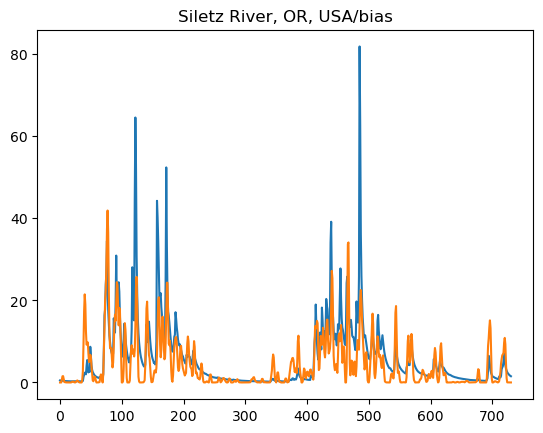

             message: Optimization terminated successfully.
             success: True
                 fun: 1.7464455084359318
                   x: [ 2.327e-02  7.219e+00 ...  4.791e+01  4.698e+00]
                 nit: 28
                nfev: 5683
          population: [[ 2.327e-02  7.219e+00 ...  4.791e+01  4.698e+00]
                       [ 1.478e+00  9.422e+00 ...  1.089e+01  2.087e+00]
                       ...
                       [ 5.653e-01  1.213e+01 ...  5.542e+01  1.772e+00]
                       [-4.169e-01  1.651e+01 ...  4.432e+01  2.789e+00]]
 population_energies: [ 1.746e+00  1.807e+00 ...  1.764e+00  1.755e+00]
                 jac: [ 0.000e+00  0.000e+00 ...  0.000e+00  0.000e+00]


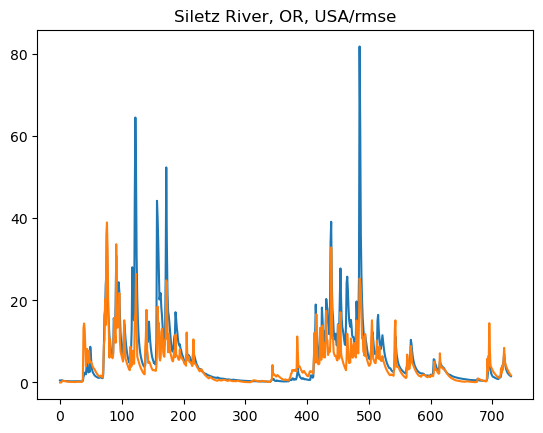

             message: Maximum number of iterations has been exceeded.
             success: False
                 fun: 5.554945666569716
                   x: [ 2.402e+00  1.269e+00 ...  8.800e+00  1.671e+00]
                 nit: 30
                nfev: 6675
          population: [[ 2.431e+00  1.197e+00 ...  8.798e+00  1.671e+00]
                       [-1.508e+00  1.232e+01 ...  7.378e+01  1.342e+00]
                       ...
                       [ 2.025e+00  6.673e+00 ...  8.975e+01  2.882e+00]
                       [-2.992e+00  1.525e+01 ...  2.470e+01  2.181e+00]]
 population_energies: [ 5.555e+00  5.894e+00 ...  6.050e+00  5.946e+00]
                 jac: [ 2.265e-04  8.565e-02 ... -6.412e-03  0.000e+00]


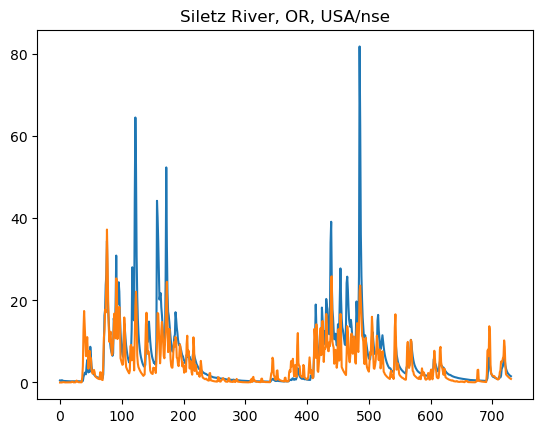

             message: Maximum number of iterations has been exceeded.
             success: False
                 fun: 0.4518872714638076
                   x: [ 2.760e+00  1.425e+00 ...  6.877e+01  2.433e+00]
                 nit: 30
                nfev: 10063
          population: [[ 2.450e+00  1.228e+00 ...  6.877e+01  2.433e+00]
                       [-1.866e+00  1.636e+00 ...  9.719e+01  2.411e+00]
                       ...
                       [-1.762e+00  3.715e+00 ...  3.289e+01  2.638e+00]
                       [-1.723e+00  3.904e-01 ...  8.636e+01  2.697e+00]]
 population_energies: [ 4.519e-01  4.679e-01 ...  4.728e-01  4.721e-01]
                 jac: [-3.864e-04  1.023e-04 ...  0.000e+00  0.000e+00]


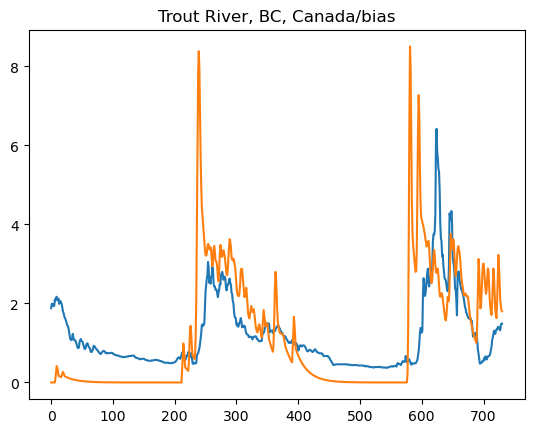

             message: Maximum number of iterations has been exceeded.
             success: False
                 fun: 1.0450935693686432e-09
                   x: [ 5.189e-01  9.931e+00 ...  3.812e+01  5.623e+00]
                 nit: 30
                nfev: 6745
          population: [[ 5.189e-01  9.931e+00 ...  3.812e+01  5.623e+00]
                       [ 9.015e-01  3.856e+00 ...  5.455e+01  4.273e+00]
                       ...
                       [ 1.265e+00  1.195e+01 ...  7.104e+01  5.641e+00]
                       [ 2.176e-01  7.251e+00 ...  4.170e+01  5.198e+00]]
 population_energies: [ 1.045e-09  1.461e-03 ...  1.414e-02  5.326e-03]
                 jac: [-6.233e-03  8.774e-04 ...  1.419e-07  0.000e+00]


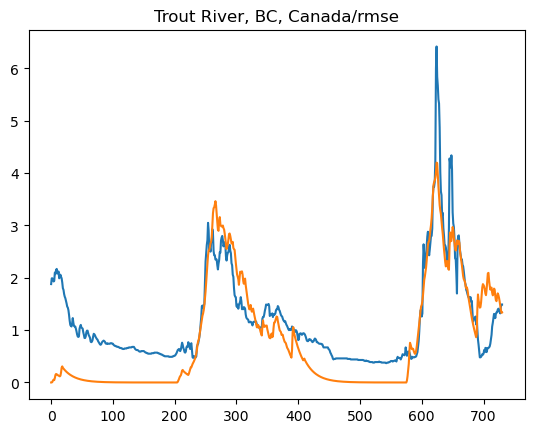

             message: Maximum number of iterations has been exceeded.
             success: False
                 fun: 0.6659811565714414
                   x: [-2.650e+00  6.554e-01 ...  7.033e+01  2.610e+00]
                 nit: 30
                nfev: 7683
          population: [[-2.674e+00  6.552e-01 ...  7.033e+01  2.610e+00]
                       [-2.314e+00  7.234e-01 ...  7.298e+01  4.072e+00]
                       ...
                       [-2.120e+00  7.528e-01 ...  7.261e+01  4.064e+00]
                       [-2.530e+00  7.529e-01 ...  9.305e+01  5.402e+00]]
 population_energies: [ 6.660e-01  6.822e-01 ...  6.844e-01  6.839e-01]
                 jac: [-2.033e-04 -1.183e-02 ...  0.000e+00  0.000e+00]


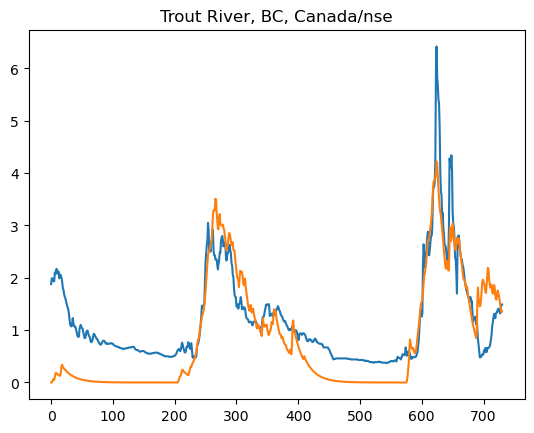

             message: Maximum number of iterations has been exceeded.
             success: False
                 fun: 0.5446001060285838
                   x: [-2.869e+00  6.163e-01 ...  7.751e+01  2.795e+00]
                 nit: 30
                nfev: 8173
          population: [[-2.803e+00  6.138e-01 ...  7.751e+01  2.795e+00]
                       [-2.825e+00  5.306e-01 ...  6.410e+01  1.285e+00]
                       ...
                       [-2.521e+00  7.055e-01 ...  6.493e+01  4.315e+00]
                       [-2.960e+00  5.380e-01 ...  4.710e+01  3.427e+00]]
 population_energies: [ 5.446e-01  5.664e-01 ...  5.574e-01  5.881e-01]
                 jac: [-5.242e-03  1.034e-02 ...  0.000e+00  0.000e+00]


In [36]:
import matplotlib.pyplot as plt

obj_funs   = {"bias": bias, "rmse": rmse, "nse": one_minus_nse}#, "bias_below_one": bias_flows_below_one}

bounds_min = [-3, 0, 0, 0, 0, 0.3, 1, 0, 0.05, 0.01, 0.005, 0, 1]
bounds_max = [3, 20, 1, 0.8, 7, 1, 2000, 100, 2, 1, 0.1, 100, 6]
bounds     = np.array(list(zip(bounds_min, bounds_max)))
parameter_names = ["Ts", "CFMAX", "CFR", "CWH", "BETA", "LP", "FC", "PERC", "K0", "K1", "K2", "UZL", "MAXBAS"]

results = []
for catchment_name in ["Medina River, TX, USA", "Siletz River, OR, USA", "Trout River, BC, Canada"]:
    
    for i, (obj_fun_name, obj_fun) in enumerate(obj_funs.items()): 

        df_obs = load_catchment_data(catchment_name)
        precip, temp, pet, q_obs = df_obs[["P [mm/day]", "T [C]", "PET [mm/day]", "Q [mm/day]"]].to_numpy().T
        
        # initial guess for parameters from uniform distribution
        x0 = np.random.uniform(low=bounds_min, high=bounds_max)
    
        # run the differntial evoluation algorithm to optimize the parameters
        hbv_calibrated = differential_evolution(loss_hbv, bounds=bounds, args=(precip, temp, pet, q_obs, obj_fun), maxiter=30)
        
        q_sim = hbv(hbv_calibrated.x, precip, temp, pet)
        plt.plot(q_obs)
        plt.plot(q_sim)
        plt.title(f"{catchment_name}/{obj_fun_name}")
        plt.show()
        print(hbv_calibrated)
        
        results.append({"catchment_name": catchment_name, "objective_function": obj_fun_name, "objective_value": hbv_calibrated.fun} | dict(zip(parameter_names, hbv_calibrated.x)))

results = pd.DataFrame.from_records(results)
results.to_csv("./data/calibrated_parameters - HBV.csv", index=False)
#results.sort_values("objective_value").groupby(["catchment_name", "objective_function"]).aggregate(pd.DataFrame.head, n=1).reset_index().to_csv("./calibrated_parameters.csv", index=False)